# first approximation check of ML algo

In [181]:
import pandas as pd
import sys, os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#get the directory of the data
pwd = os.path.dirname(os.getcwd())
df = pd.read_csv(pwd +  "/InputData/dataframe/aux.csv")
df =df.drop(['trackNum','catIdx'],1)



In [182]:
y = df['aux'].values
lifetime = df['lifetime']
df = df.drop(['aux'], axis=1)
col_names = df.columns
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df = pd.DataFrame(features, columns = col_names)
# df['lifetime'] = lifetime
X  = df
assert len(y) == len(X)

## Training

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train_temp = X_train

In [184]:
N,D = X_train.shape

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30)

Epoch 1/30
172/172 [==============================] - 1s 4ms/step - loss: 0.9019 - accuracy: 0.4508 - val_loss: 0.7223 - val_accuracy: 0.5653
Epoch 2/30
172/172 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6387 - val_loss: 0.5620 - val_accuracy: 0.7808
Epoch 3/30
172/172 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.8080 - val_loss: 0.4645 - val_accuracy: 0.8803
Epoch 4/30
172/172 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8913 - val_loss: 0.3995 - val_accuracy: 0.9311
Epoch 5/30
172/172 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.9200 - val_loss: 0.3519 - val_accuracy: 0.9497
Epoch 6/30
172/172 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.9372 - val_loss: 0.3161 - val_accuracy: 0.9535
Epoch 7/30
172/172 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.9422 - val_loss: 0.2878 - val_accuracy: 0.9584
Epoch 

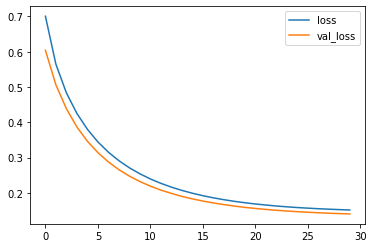

In [171]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

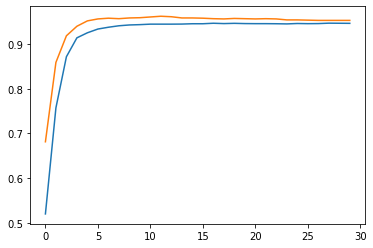

In [172]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')

## Predicting

In [176]:
model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9530


[0.1403442621231079, 0.9529797434806824]

## Save Model

In [178]:
model.save("linearclassifier.h5")

## Load model

In [180]:
model = tf.keras.models.load_model('linearclassifier.h5')
model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9530


[0.1403442621231079, 0.9529797434806824]